In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [2]:
date_cols = [
    'Auftragseingang', 
    'Auftragsende_SOLL',
    'AFO_Start_SOLL',
    'AFO_Ende_SOLL',
    'AFO_Start_IST',
    'AFO_Ende_IST',
    'Auftragsende_IST' 
]

data = pd.read_csv(
    '../data/processed/data_cleaned_timestamp_1.csv',
    parse_dates=date_cols,
    sep=',',
    low_memory=False
)

In [3]:
print(data.columns.tolist())


['AuftragsID', 'BauteilID', 'Bauteilbezeichnung', 'Auftragseingang', 'Priorität', 'Auftragsende_SOLL', 'Arbeitsschritt', 'Arbeitsschrittbezeichnung', 'AFO_Start_SOLL', 'AFO_Ende_SOLL', 'AFO_Start_IST', 'AFO_Ende_IST', 'MaschinenID', 'Maschinenbezeichnung', 'Kapazität', 'Auftragsende_IST', 'AFO_Dauer_IST_Stunde', 'Auftragsdauer_IST_Tag']


In [4]:
data.rename(columns={'Kapazität': 'Maschinenkapazität'}, inplace=True)

In [5]:

data.head()

,AuftragsID,BauteilID,Bauteilbezeichnung,Auftragseingang,Priorität,Auftragsende_SOLL,Arbeitsschritt,Arbeitsschrittbezeichnung,AFO_Start_SOLL,AFO_Ende_SOLL,AFO_Start_IST,AFO_Ende_IST,MaschinenID,Maschinenbezeichnung,Maschinenkapazität,Auftragsende_IST,AFO_Dauer_IST_Stunde,Auftragsdauer_IST_Tag
0,1,1,Steuerventilmodul,2013-10-29,1,2014-01-01 11:32:00,1,Info,2014-01-01 07:00:00,2014-01-01 07:01:00,2014-01-01 07:00:00,2014-01-01 07:01:00,NaN,NaN,NaN,2014-05-07 08:39:00,0.02,136.21
1,2,1,Steuerventilmodul,2013-08-16,1,2014-01-01 11:32:00,1,Info,2014-01-01 07:00:00,2014-01-01 07:01:00,2014-01-01 07:00:00,2014-01-01 07:01:00,NaN,NaN,NaN,2014-05-07 09:04:00,0.02,188.26
2,3,1,Steuerventilmodul,2013-08-05,1,2014-01-01 11:32:00,1,Info,2014-01-01 07:00:00,2014-01-01 07:01:00,2014-01-01 07:00:00,2014-01-01 07:01:00,NaN,NaN,NaN,2014-05-07 11:25:00,0.02,197.55
3,4,1,Steuerventilmodul,2013-10-12,1,2014-01-01 11:32:00,1,Info,2014-01-01 07:00:00,2014-01-01 07:01:00,2014-01-01 07:00:00,2014-01-01 07:01:00,NaN,NaN,NaN,2014-05-07 09:19:00,0.02,147.29
4,5,1,Steuerventilmodul,2013-10-03,1,2014-01-01 11:32:00,1,Info,2014-01-01 07:00:00,2014-01-01 07:01:00,2014-01-01 07:00:00,2014-01-01 07:01:00,NaN,NaN,NaN,2014-05-07 09:07:00,0.02,154.26


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465664 entries, 0 to 1465663
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   AuftragsID                 1465664 non-null  int64         
 1   BauteilID                  1465664 non-null  int64         
 2   Bauteilbezeichnung         1465664 non-null  object        
 3   Auftragseingang            1465664 non-null  datetime64[ns]
 4   Priorität                  1465664 non-null  int64         
 5   Auftragsende_SOLL          1465664 non-null  datetime64[ns]
 6   Arbeitsschritt             1465664 non-null  int64         
 7   Arbeitsschrittbezeichnung  1465664 non-null  object        
 8   AFO_Start_SOLL             1465664 non-null  datetime64[ns]
 9   AFO_Ende_SOLL              1465664 non-null  datetime64[ns]
 10  AFO_Start_IST              1465664 non-null  datetime64[ns]
 11  AFO_Ende_IST               1465664 no

In [7]:
missing = data.isna().sum().sort_values(ascending=False)
missing.head(10)

Maschinenkapazität       949393
Maschinenbezeichnung     948672
MaschinenID              287699
Auftragsdauer_IST_Tag     58828
Auftragsende_IST          58828
BauteilID                     0
AFO_Dauer_IST_Stunde          0
AFO_Ende_IST                  0
AFO_Start_IST                 0
AuftragsID                    0
dtype: int64

In [8]:
# Fehlende Maschineninformationen treten ausschließlich bei den Arbeitsschritten 'Info' und 'End' auf.
# Diese Schritte repräsentieren keine realen Bearbeitungsprozesse,
# sondern systemische Platzhalter (Start-/Endmarken). 
# Für Analysen produktiver Vorgänge werden sie entfernt oder separat markiert.

pd.crosstab(
    data["Arbeitsschrittbezeichnung"],
    data["MaschinenID"].isna(),
    normalize="index"
).sort_values(by=True, ascending=False).head(15)


MaschinenID,False,True
Arbeitsschrittbezeichnung,,
End,0.000000,1.000000
Info,0.004918,0.995082
Abspannen-Nacharbeiten,1.000000,0.000000
Aufspannen,1.000000,0.000000
Heften-Schweißen,1.000000,0.000000
Lackieren,1.000000,0.000000
Mechanisch Bearbeiten,1.000000,0.000000
Nachschweißen,1.000000,0.000000
Richten,1.000000,0.000000


In [9]:
machine_overview = (
    data
    .dropna(subset=["MaschinenID"])
    .drop_duplicates(subset=["MaschinenID"])
    .loc[:, ["MaschinenID", "Maschinenbezeichnung", "Maschinenkapazität"]]
    .sort_values("MaschinenID")
)
machine_overview

,MaschinenID,Maschinenbezeichnung,Maschinenkapazität
1346,-,XXX,NaN
83,1,EWM,18.0
117,2,Fronius,1.0
74,3,Deckel Maho,8.0
84,4,DMG Mori,8.0
359,5,Lorch,3.0
32,Transport/Rüsten,NaN,NaN


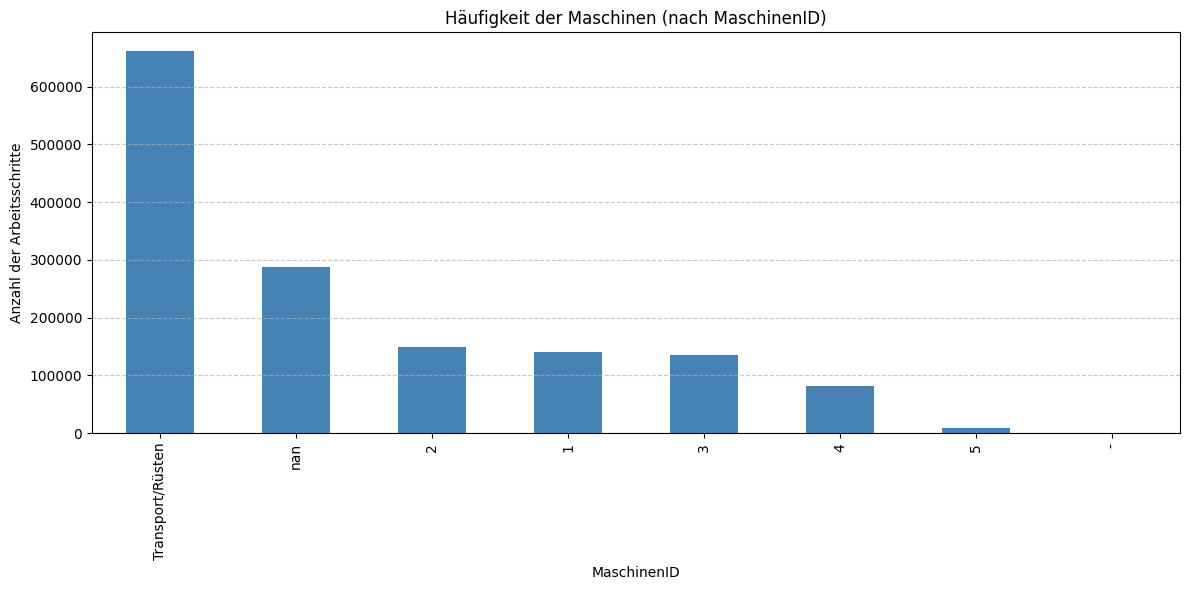

In [10]:
# Maschinenverwendung zählen
machine_counts = (
    data["MaschinenID"]
    .value_counts(dropna=False)   # NaN mit anzeigen
    .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(12,6))
machine_counts.plot(kind="bar", color="steelblue")
plt.title("Häufigkeit der Maschinen (nach MaschinenID)")
plt.xlabel("MaschinenID")
plt.ylabel("Anzahl der Arbeitsschritte")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [11]:
check_machine_consistency = (
    data
    .groupby("MaschinenID")[["Maschinenbezeichnung", "Maschinenkapazität"]]
    .nunique()
    .sort_values("Maschinenbezeichnung", ascending=False)
)

check_machine_consistency.head(10)


,Maschinenbezeichnung,Maschinenkapazität
MaschinenID,,
-,1,1
1,1,19
2,1,25
3,1,1
4,1,8
5,1,1
Transport/Rüsten,0,0


In [12]:
# Prüfen, welche Kombinationen fehlen
mask_id_no_name = data["MaschinenID"].notna() & data["Maschinenbezeichnung"].isna()
mask_name_no_id = data["MaschinenID"].isna() & data["Maschinenbezeichnung"].notna()

# Anzahl beider Fälle
print("MaschinenID vorhanden, aber Bezeichnung fehlt:", mask_id_no_name.sum())
print("Maschinenbezeichnung vorhanden, aber ID fehlt:", mask_name_no_id.sum())


MaschinenID vorhanden, aber Bezeichnung fehlt: 660973
Maschinenbezeichnung vorhanden, aber ID fehlt: 0


In [13]:
# Gruppierte Übersicht: Wie oft pro ID Bezeichnung und Kapazität vorhanden oder fehlt
maschine_status = (
    data.groupby("MaschinenID")
    .apply(lambda x: pd.Series({
        "Bezeichnung_vorhanden": x["Maschinenbezeichnung"].notna().sum(),
        "Bezeichnung_fehlend": x["Maschinenbezeichnung"].isna().sum(),
        "Kapazität_vorhanden": x["Maschinenkapazität"].notna().sum(),
        "Kapazität_fehlend": x["Maschinenkapazität"].isna().sum(),
        "Gesamt": len(x)
    }))
    .reset_index()
    .sort_values(by="Bezeichnung_fehlend", ascending=False)
)

# Fehlraten berechnen (optional)
maschine_status["Fehlrate_Bezeichnung_%"] = (
    maschine_status["Bezeichnung_fehlend"] / maschine_status["Gesamt"] * 100
).round(2)

maschine_status["Fehlrate_Kapazität_%"] = (
    maschine_status["Kapazität_fehlend"] / maschine_status["Gesamt"] * 100
).round(2)

maschine_status.head(10)


/var/folders/tj/7mvrvxz94yzdsyf2fkrpjyz80000gn/T/ipykernel_42816/2660534264.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data.groupby("MaschinenID")


,MaschinenID,Bezeichnung_vorhanden,Bezeichnung_fehlend,Kapazität_vorhanden,Kapazität_fehlend,Gesamt,Fehlrate_Bezeichnung_%,Fehlrate_Kapazität_%
6,Transport/Rüsten,0,660973,0,660973,660973,100.0,100.0
0,-,738,0,17,721,738,0.0,97.7
1,1,140628,0,140628,0,140628,0.0,0.0
2,2,148537,0,148537,0,148537,0.0,0.0
3,3,135182,0,135182,0,135182,0.0,0.0
4,4,82316,0,82316,0,82316,0.0,0.0
5,5,9591,0,9591,0,9591,0.0,0.0


In [14]:
mask_name_no_id = ((data["MaschinenID"].isna()) | (data["MaschinenID"] == '-')) & data["Maschinenbezeichnung"].notna()
data[mask_name_no_id]

,AuftragsID,BauteilID,Bauteilbezeichnung,Auftragseingang,Priorität,Auftragsende_SOLL,Arbeitsschritt,Arbeitsschrittbezeichnung,AFO_Start_SOLL,AFO_Ende_SOLL,AFO_Start_IST,AFO_Ende_IST,MaschinenID,Maschinenbezeichnung,Maschinenkapazität,Auftragsende_IST,AFO_Dauer_IST_Stunde,Auftragsdauer_IST_Tag
1346,302,1,Steuerventilmodul,2013-10-27,1,2014-01-07 09:22:00,1,Info,2014-01-06 07:00:00,2014-01-06 07:01:00,2014-01-06 07:00:00,2014-01-06 07:01:00,-,XXX,NaN,2014-05-12 07:08:00,0.02,140.02
3404,673,2,Schwenkzylinder,2013-05-30,1,2013-09-09 07:42:00,42,Abspannen-Nacharbeiten,2013-09-06 13:11:00,2013-09-09 07:11:00,2014-01-09 07:35:00,2014-01-09 08:48:00,-,XXX,8.0,2014-01-09 09:19:00,1.22,160.29
4011,702,1,Steuerventilmodul,2013-11-10,1,2014-01-10 11:52:00,1,Info,2014-01-10 07:00:00,2014-01-10 07:01:00,2014-01-10 07:00:00,2014-01-10 07:01:00,-,XXX,NaN,2014-05-16 11:04:00,0.02,134.51
4242,744,2,Schwenkzylinder,2013-03-24,1,2013-09-10 09:42:00,42,Abspannen-Nacharbeiten,2013-09-09 09:21:00,2013-09-10 09:11:00,2014-01-10 08:28:00,2014-01-10 09:28:00,-,XXX,8.0,2014-01-10 09:59:00,1.00,209.37
8605,1601,2,Schwenkzylinder,2013-10-12,3,2014-01-28 09:22:00,1,Info,2014-01-27 07:00:00,2014-01-27 07:01:00,2014-01-27 07:00:00,2014-01-27 07:01:00,-,XXX,NaN,2014-01-28 13:48:00,0.02,76.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452102,149063,2,Schwenkzylinder,2023-12-04,1,2024-01-29 14:12:00,1,Info,2024-01-26 07:00:00,2024-01-26 07:01:00,2024-01-26 07:00:00,2024-01-26 07:01:00,-,XXX,NaN,NaT,0.02,NaN
1454188,149215,2,Schwenkzylinder,2023-08-27,1,2024-02-01 14:02:00,1,Info,2024-02-01 07:00:00,2024-02-01 07:01:00,2024-02-01 07:00:00,2024-02-01 07:01:00,-,XXX,NaN,NaT,0.02,NaN
1455426,149383,1,Steuerventilmodul,2024-01-18,1,2024-02-07 09:22:00,1,Info,2024-02-06 07:00:00,2024-02-06 07:01:00,2024-02-06 07:00:00,2024-02-06 07:01:00,-,XXX,NaN,NaT,0.02,NaN
1461343,149894,1,Steuerventilmodul,2023-11-16,1,2024-02-22 14:52:00,1,Info,2024-02-22 07:00:00,2024-02-22 07:01:00,2024-02-22 07:00:00,2024-02-22 07:01:00,-,XXX,NaN,NaT,0.02,NaN


In [15]:
# MaschinenID "Transport/Rüsten" hat keine Bezeichnung und Kapazität
# Kein echter Maschinenenprozess, wahrscheinlich zwischenschritt 

# 1) Boolean-Flag für Transport/Rüsten setzen (robust gegen Groß-/Kleinschreibung & Spaces)
is_transport = (
    data["MaschinenID"].astype(str).str.strip().str.lower() == "transport/rüsten"
)
data["is_transport_ruesten"] = is_transport

# 2) Für Transport/Rüsten die MaschinenID (und optional Bezeichnung/Kapazität) auf NaN setzen
data.loc[is_transport, "MaschinenID"] = pd.NA
data.loc[is_transport, "Maschinenbezeichnung"] = pd.NA   # optional, empfehlenswert
data.loc[is_transport, "Maschinenkapazität"] = pd.NA     # optional, empfehlenswert

# 3) Kontrolle
print("Transport/Rüsten-Zeilen:", is_transport.sum())
print("MaschinenID nun NaN in diesen Zeilen:",
      data.loc[is_transport, "MaschinenID"].isna().all())
print("Bezeichnung nun NaN in diesen Zeilen:",
      data.loc[is_transport, "Maschinenbezeichnung"].isna().all())
print("Kapazität nun NaN in diesen Zeilen:",
      data.loc[is_transport, "Maschinenkapazität"].isna().all())


# Alle NaN (NumPy) durch Pandas-NA ersetzen
data = data.replace({np.nan: pd.NA})

# Optional: sicherstellen, dass die Spalte einen "nullable" dtype hat
data["MaschinenID"] = data["MaschinenID"].astype("string")


Transport/Rüsten-Zeilen: 660973
MaschinenID nun NaN in diesen Zeilen: True
Bezeichnung nun NaN in diesen Zeilen: True
Kapazität nun NaN in diesen Zeilen: True


In [16]:
data["is_transport_ruesten"].value_counts()

is_transport_ruesten
False    804691
True     660973
Name: count, dtype: int64

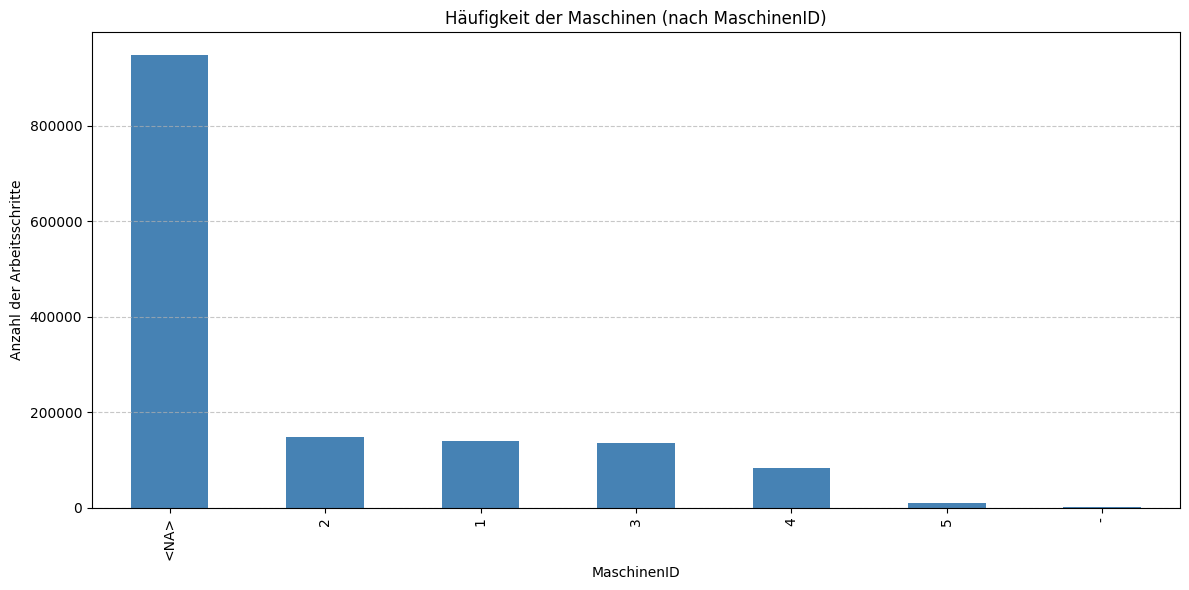

In [17]:
# Maschinenverwendung zählen
machine_counts = (
    data["MaschinenID"]
    .value_counts(dropna=False)   # NaN mit anzeigen
    .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(12,6))
machine_counts.plot(kind="bar", color="steelblue")
plt.title("Häufigkeit der Maschinen (nach MaschinenID)")
plt.xlabel("MaschinenID")
plt.ylabel("Anzahl der Arbeitsschritte")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [18]:
mask_dash = data["MaschinenID"].astype(str).str.strip() == "-"
data_dash = data[mask_dash]

print("Anzahl der Zeilen mit MaschinenID='-':", mask_dash.sum())
data_dash[["MaschinenID", "Maschinenbezeichnung", "Maschinenkapazität"]].head()


Anzahl der Zeilen mit MaschinenID='-': 738


,MaschinenID,Maschinenbezeichnung,Maschinenkapazität
1346,-,XXX,<NA>
3404,-,XXX,8.0
4011,-,XXX,<NA>
4242,-,XXX,8.0
8605,-,XXX,<NA>


In [19]:
data.loc[mask_dash]

,AuftragsID,BauteilID,Bauteilbezeichnung,Auftragseingang,Priorität,Auftragsende_SOLL,Arbeitsschritt,Arbeitsschrittbezeichnung,AFO_Start_SOLL,AFO_Ende_SOLL,AFO_Start_IST,AFO_Ende_IST,MaschinenID,Maschinenbezeichnung,Maschinenkapazität,Auftragsende_IST,AFO_Dauer_IST_Stunde,Auftragsdauer_IST_Tag,is_transport_ruesten
1346,302,1,Steuerventilmodul,2013-10-27,1,2014-01-07 09:22:00,1,Info,2014-01-06 07:00:00,2014-01-06 07:01:00,2014-01-06 07:00:00,2014-01-06 07:01:00,-,XXX,<NA>,2014-05-12 07:08:00,0.02,140.02,False
3404,673,2,Schwenkzylinder,2013-05-30,1,2013-09-09 07:42:00,42,Abspannen-Nacharbeiten,2013-09-06 13:11:00,2013-09-09 07:11:00,2014-01-09 07:35:00,2014-01-09 08:48:00,-,XXX,8.0,2014-01-09 09:19:00,1.22,160.29,False
4011,702,1,Steuerventilmodul,2013-11-10,1,2014-01-10 11:52:00,1,Info,2014-01-10 07:00:00,2014-01-10 07:01:00,2014-01-10 07:00:00,2014-01-10 07:01:00,-,XXX,<NA>,2014-05-16 11:04:00,0.02,134.51,False
4242,744,2,Schwenkzylinder,2013-03-24,1,2013-09-10 09:42:00,42,Abspannen-Nacharbeiten,2013-09-09 09:21:00,2013-09-10 09:11:00,2014-01-10 08:28:00,2014-01-10 09:28:00,-,XXX,8.0,2014-01-10 09:59:00,1.00,209.37,False
8605,1601,2,Schwenkzylinder,2013-10-12,3,2014-01-28 09:22:00,1,Info,2014-01-27 07:00:00,2014-01-27 07:01:00,2014-01-27 07:00:00,2014-01-27 07:01:00,-,XXX,<NA>,2014-01-28 13:48:00,0.02,76.85,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452102,149063,2,Schwenkzylinder,2023-12-04,1,2024-01-29 14:12:00,1,Info,2024-01-26 07:00:00,2024-01-26 07:01:00,2024-01-26 07:00:00,2024-01-26 07:01:00,-,XXX,<NA>,NaT,0.02,<NA>,False
1454188,149215,2,Schwenkzylinder,2023-08-27,1,2024-02-01 14:02:00,1,Info,2024-02-01 07:00:00,2024-02-01 07:01:00,2024-02-01 07:00:00,2024-02-01 07:01:00,-,XXX,<NA>,NaT,0.02,<NA>,False
1455426,149383,1,Steuerventilmodul,2024-01-18,1,2024-02-07 09:22:00,1,Info,2024-02-06 07:00:00,2024-02-06 07:01:00,2024-02-06 07:00:00,2024-02-06 07:01:00,-,XXX,<NA>,NaT,0.02,<NA>,False
1461343,149894,1,Steuerventilmodul,2023-11-16,1,2024-02-22 14:52:00,1,Info,2024-02-22 07:00:00,2024-02-22 07:01:00,2024-02-22 07:00:00,2024-02-22 07:01:00,-,XXX,<NA>,NaT,0.02,<NA>,False


In [20]:
# Maske für MaschinenID '-'
mask_dash = data["MaschinenID"].astype(str).str.strip() == "-"

# Anzahl der Zeilen anzeigen
print("Anzahl der Zeilen mit MaschinenID='-':", mask_dash.sum())

# Relevante Spalten anzeigen
data.loc[
    mask_dash,
    ["MaschinenID", "Maschinenbezeichnung","Maschinenkapazität", "Arbeitsschrittbezeichnung"]
]


Anzahl der Zeilen mit MaschinenID='-': 738


,MaschinenID,Maschinenbezeichnung,Maschinenkapazität,Arbeitsschrittbezeichnung
1346,-,XXX,<NA>,Info
3404,-,XXX,8.0,Abspannen-Nacharbeiten
4011,-,XXX,<NA>,Info
4242,-,XXX,8.0,Abspannen-Nacharbeiten
8605,-,XXX,<NA>,Info
...,...,...,...,...
1452102,-,XXX,<NA>,Info
1454188,-,XXX,<NA>,Info
1455426,-,XXX,<NA>,Info
1461343,-,XXX,<NA>,Info


In [21]:
# Maske für MaschinenID '-'
mask_dash = data["MaschinenID"].astype(str).str.strip() == "-"

# Subset
df_dash = data.loc[mask_dash, ["MaschinenID", "Maschinenkapazität", "Arbeitsschrittbezeichnung"]]

# Getrennte Auswertung für NA und 8.0
df_na = df_dash[df_dash["Maschinenkapazität"].isna()]
df_8  = df_dash[df_dash["Maschinenkapazität"] == 8.0]

print("🔹 MaschinenID='-' mit Maschinenkapazität <NA>:")
print(df_na["Arbeitsschrittbezeichnung"].value_counts(dropna=False))
print("\nEindeutige Arbeitsschritte:", df_na["Arbeitsschrittbezeichnung"].nunique())

print("\n🔹 MaschinenID='-' mit Maschinenkapazität 8.0:")
print(df_8["Arbeitsschrittbezeichnung"].value_counts(dropna=False))
print("\nEindeutige Arbeitsschritte:", df_8["Arbeitsschrittbezeichnung"].nunique())


🔹 MaschinenID='-' mit Maschinenkapazität <NA>:
Arbeitsschrittbezeichnung
Info    721
Name: count, dtype: int64

Eindeutige Arbeitsschritte: 1

🔹 MaschinenID='-' mit Maschinenkapazität 8.0:
Arbeitsschrittbezeichnung
Abspannen-Nacharbeiten    10
Nachschweißen              7
Name: count, dtype: int64

Eindeutige Arbeitsschritte: 2


In [22]:
# 🎯 Bedingung: MaschinenID = '-' UND Arbeitsschrittbezeichnung = 'Info'
mask_info = (
    data["MaschinenID"].astype(str).str.strip() == "-"
) & (
    data["Arbeitsschrittbezeichnung"].astype(str).str.strip().str.lower() == "info"
)

# 🧮 Kontrollausgabe
print("Anzahl betroffener Zeilen (MaschinenID='-' & Arbeitsschrittbezeichnung='Info'):", mask_info.sum())

# 🆕 Neue Spalte 'info' hinzufügen mit kurzer Notiz
data.loc[mask_info, "info"] = "MaschinenID '-' + Arbeitsschritt='Info' (Platzhalter, kein Maschinenprozess)"

# 🧹 Maschinenfelder auf NaN setzen
data.loc[mask_info, ["MaschinenID", "Maschinenbezeichnung", "Maschinenkapazität"]] = pd.NA

# ✅ Kontrolle
print("MaschinenID nun NaN:", data.loc[mask_info, "MaschinenID"].isna().all())
print("Neue Info-Spalte gesetzt:", data.loc[mask_info, "info"].notna().all())

Anzahl betroffener Zeilen (MaschinenID='-' & Arbeitsschrittbezeichnung='Info'): 721
MaschinenID nun NaN: True
Neue Info-Spalte gesetzt: True


In [23]:


# 🎯 Filter: Kapazität = 8.0 UND Arbeitsschritt in ['Nachschweißen', 'Abspannen-Nacharbeiten']
mask = (
    (data["Maschinenkapazität"] == 8.0) &
    (data["Arbeitsschrittbezeichnung"].isin(["Nachschweißen", "Abspannen-Nacharbeiten"]))
)

# 🔍 Gefilterte Daten
df_filtered = data.loc[mask, ["MaschinenID", "Maschinenbezeichnung", "Arbeitsschrittbezeichnung", "Maschinenkapazität"]]

# 🧮 Gruppieren und zählen
machine_counts = (
    df_filtered.groupby(["MaschinenID", "Maschinenbezeichnung", "Arbeitsschrittbezeichnung","Maschinenkapazität"])
    .size()
    .reset_index(name="Einsatz_Häufigkeit")
    .sort_values("Einsatz_Häufigkeit", ascending=False)
)

# 📋 Ergebnisse anzeigen
print("Anzahl der relevanten Zeilen:", len(df_filtered))
machine_counts.head(10)


Anzahl der relevanten Zeilen: 135199


,MaschinenID,Maschinenbezeichnung,Arbeitsschrittbezeichnung,Maschinenkapazität,Einsatz_Häufigkeit
2,3,Deckel Maho,Abspannen-Nacharbeiten,8.0,73344
3,3,Deckel Maho,Nachschweißen,8.0,61838
0,-,XXX,Abspannen-Nacharbeiten,8.0,10
1,-,XXX,Nachschweißen,8.0,7


In [24]:
# Maske für die 12 fehlerhaften Einträge
mask_fix = (
    (data["MaschinenID"].astype(str).str.strip() == "-") &
    (data["Maschinenbezeichnung"].astype(str).str.strip() == "XXX") &
    (data["Maschinenkapazität"] == 8.0) &
    (data["Arbeitsschrittbezeichnung"].isin(["Nachschweißen", "Abspannen-Nacharbeiten"]))
)

# Optional: Kontrolle
print("Anzahl der betroffenen Zeilen:", mask_fix.sum())

# Korrektur durchführen
data.loc[mask_fix, "MaschinenID"] = "3"
data.loc[mask_fix, "Maschinenbezeichnung"] = "Deckel Maho"

# Info-Spalte ergänzen, damit die Änderung nachvollziehbar bleibt
data.loc[mask_fix, "info"] = "MaschinenID '-' (XXX) korrigiert zu 'Deckel Maho' basierend auf Kapazität=8.0 & Arbeitsschritt"

# Kontrolle nachher
data.loc[mask_fix, ["MaschinenID", "Maschinenbezeichnung", "Arbeitsschrittbezeichnung", "info"]]


Anzahl der betroffenen Zeilen: 17


,MaschinenID,Maschinenbezeichnung,Arbeitsschrittbezeichnung,info
3404,3,Deckel Maho,Abspannen-Nacharbeiten,MaschinenID '-' (XXX) korrigiert zu 'Deckel Ma...
4242,3,Deckel Maho,Abspannen-Nacharbeiten,MaschinenID '-' (XXX) korrigiert zu 'Deckel Ma...
11258,3,Deckel Maho,Abspannen-Nacharbeiten,MaschinenID '-' (XXX) korrigiert zu 'Deckel Ma...
11693,3,Deckel Maho,Abspannen-Nacharbeiten,MaschinenID '-' (XXX) korrigiert zu 'Deckel Ma...
13499,3,Deckel Maho,Abspannen-Nacharbeiten,MaschinenID '-' (XXX) korrigiert zu 'Deckel Ma...
14640,3,Deckel Maho,Abspannen-Nacharbeiten,MaschinenID '-' (XXX) korrigiert zu 'Deckel Ma...
18430,3,Deckel Maho,Nachschweißen,MaschinenID '-' (XXX) korrigiert zu 'Deckel Ma...
20997,3,Deckel Maho,Nachschweißen,MaschinenID '-' (XXX) korrigiert zu 'Deckel Ma...
23053,3,Deckel Maho,Abspannen-Nacharbeiten,MaschinenID '-' (XXX) korrigiert zu 'Deckel Ma...
32254,3,Deckel Maho,Nachschweißen,MaschinenID '-' (XXX) korrigiert zu 'Deckel Ma...


In [25]:
machine_overview = (
    data
    .dropna(subset=["MaschinenID"])
    .drop_duplicates(subset=["MaschinenID"])
    .loc[:, ["MaschinenID", "Maschinenbezeichnung", "Maschinenkapazität"]]
    .sort_values("MaschinenID")
)
machine_overview

,MaschinenID,Maschinenbezeichnung,Maschinenkapazität
83,1,EWM,18.0
117,2,Fronius,1.0
74,3,Deckel Maho,8.0
84,4,DMG Mori,8.0
359,5,Lorch,3.0


In [26]:
for mid in ["1", "2", "4"]:
    print(mid)
    print(data.loc[data["MaschinenID"]==mid, "Maschinenkapazität"].value_counts().sort_index().head(20))
    print("-"*30)


1
Maschinenkapazität
1.0      1086
2.0      1453
3.0      1662
4.0      1958
5.0      2805
6.0      4860
7.0      8149
8.0     10628
9.0      9334
10.0     6512
11.0     4755
12.0     3600
13.0     3114
14.0     2839
15.0     2263
16.0     2356
17.0     2055
18.0     2040
19.0    69159
Name: count, dtype: int64
------------------------------
2
Maschinenkapazität
1.0      1531
2.0      1971
3.0      2019
4.0      2210
5.0      3029
6.0      4745
7.0      7467
8.0     10429
9.0     11565
10.0    10492
11.0     8294
12.0     6185
13.0     4930
14.0     4492
15.0     4589
16.0     5026
17.0     5748
18.0     6779
19.0     7739
20.0     8112
Name: count, dtype: int64
------------------------------
4
Maschinenkapazität
1.0      208
2.0      310
3.0      399
4.0      520
5.0      543
6.0      620
7.0      749
8.0    78967
Name: count, dtype: int64
------------------------------


In [27]:
# 🕒 Sicherstellen, dass dein Datum als Datetime vorliegt
data["AFO_Start_IST"] = pd.to_datetime(data["AFO_Start_IST"], errors="coerce")

# 🧩 Relevante Spalten
df_time = data[["MaschinenID", "Maschinenkapazität", "AFO_Start_IST"]].dropna(subset=["MaschinenID", "Maschinenkapazität", "AFO_Start_IST"])

# 🧮 Gruppieren: Erste & letzte Verwendung jeder Kapazität pro Maschine
kapaz_hist = (
    df_time.groupby(["MaschinenID", "Maschinenkapazität"])["AFO_Start_IST"]
    .agg(["min", "max", "count"])
    .reset_index()
    .sort_values(["MaschinenID", "min"])
)

kapaz_hist.head(20)

,MaschinenID,Maschinenkapazität,min,max,count
17,1,18.0,2014-01-01 07:31:00,2024-03-01 12:02:00,2040
18,1,19.0,2014-01-01 07:47:00,2024-03-01 12:38:00,69159
1,1,2.0,2014-01-01 08:51:00,2024-02-26 09:12:00,1453
3,1,4.0,2014-01-01 08:59:00,2024-02-23 10:29:00,1958
4,1,5.0,2014-01-01 09:04:00,2024-02-28 12:50:00,2805
5,1,6.0,2014-01-01 09:05:00,2024-02-29 14:21:00,4860
6,1,7.0,2014-01-01 09:12:00,2024-03-01 07:28:00,8149
7,1,8.0,2014-01-01 09:19:00,2024-03-01 07:29:00,10628
8,1,9.0,2014-01-01 09:21:00,2024-02-29 14:41:00,9334
2,1,3.0,2014-01-02 08:59:00,2024-02-26 09:13:00,1662


In [28]:
machine_overview = (
    data
    .dropna(subset=["MaschinenID"])
    .drop_duplicates(subset=["MaschinenID"])
    .loc[:, ["MaschinenID", "Maschinenbezeichnung", "Maschinenkapazität"]]
    .sort_values("MaschinenID")
)
machine_overview

,MaschinenID,Maschinenbezeichnung,Maschinenkapazität
83,1,EWM,18.0
117,2,Fronius,1.0
74,3,Deckel Maho,8.0
84,4,DMG Mori,8.0
359,5,Lorch,3.0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465664 entries, 0 to 1465663
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   AuftragsID                 1465664 non-null  int64         
 1   BauteilID                  1465664 non-null  int64         
 2   Bauteilbezeichnung         1465664 non-null  object        
 3   Auftragseingang            1465664 non-null  datetime64[ns]
 4   Priorität                  1465664 non-null  int64         
 5   Auftragsende_SOLL          1465664 non-null  datetime64[ns]
 6   Arbeitsschritt             1465664 non-null  int64         
 7   Arbeitsschrittbezeichnung  1465664 non-null  object        
 8   AFO_Start_SOLL             1465664 non-null  datetime64[ns]
 9   AFO_Ende_SOLL              1465664 non-null  datetime64[ns]
 10  AFO_Start_IST              1465664 non-null  datetime64[ns]
 11  AFO_Ende_IST               1465664 no

In [30]:
data['BauteilID'] = data['BauteilID'].astype('Int64')
data['MaschinenID'] = data['MaschinenID'].astype('Int64')
data['Priorität'] = data['Priorität'].astype('Int64')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465664 entries, 0 to 1465663
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   AuftragsID                 1465664 non-null  int64         
 1   BauteilID                  1465664 non-null  Int64         
 2   Bauteilbezeichnung         1465664 non-null  object        
 3   Auftragseingang            1465664 non-null  datetime64[ns]
 4   Priorität                  1465664 non-null  Int64         
 5   Auftragsende_SOLL          1465664 non-null  datetime64[ns]
 6   Arbeitsschritt             1465664 non-null  int64         
 7   Arbeitsschrittbezeichnung  1465664 non-null  object        
 8   AFO_Start_SOLL             1465664 non-null  datetime64[ns]
 9   AFO_Ende_SOLL              1465664 non-null  datetime64[ns]
 10  AFO_Start_IST              1465664 non-null  datetime64[ns]
 11  AFO_Ende_IST               1465664 no

In [32]:
data.rename(columns={'Maschinenkapazität': 'Kapazität'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465664 entries, 0 to 1465663
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   AuftragsID                 1465664 non-null  int64         
 1   BauteilID                  1465664 non-null  Int64         
 2   Bauteilbezeichnung         1465664 non-null  object        
 3   Auftragseingang            1465664 non-null  datetime64[ns]
 4   Priorität                  1465664 non-null  Int64         
 5   Auftragsende_SOLL          1465664 non-null  datetime64[ns]
 6   Arbeitsschritt             1465664 non-null  int64         
 7   Arbeitsschrittbezeichnung  1465664 non-null  object        
 8   AFO_Start_SOLL             1465664 non-null  datetime64[ns]
 9   AFO_Ende_SOLL              1465664 non-null  datetime64[ns]
 10  AFO_Start_IST              1465664 non-null  datetime64[ns]
 11  AFO_Ende_IST               1465664 no

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465664 entries, 0 to 1465663
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   AuftragsID                 1465664 non-null  int64         
 1   BauteilID                  1465664 non-null  Int64         
 2   Bauteilbezeichnung         1465664 non-null  object        
 3   Auftragseingang            1465664 non-null  datetime64[ns]
 4   Priorität                  1465664 non-null  Int64         
 5   Auftragsende_SOLL          1465664 non-null  datetime64[ns]
 6   Arbeitsschritt             1465664 non-null  int64         
 7   Arbeitsschrittbezeichnung  1465664 non-null  object        
 8   AFO_Start_SOLL             1465664 non-null  datetime64[ns]
 9   AFO_Ende_SOLL              1465664 non-null  datetime64[ns]
 10  AFO_Start_IST              1465664 non-null  datetime64[ns]
 11  AFO_Ende_IST               1465664 no

In [34]:
data.drop(columns=[
    'Kapazität',
    'AFO_Dauer_IST_Stunde',
    'Auftragsdauer_IST_Tag',
    'is_transport_ruesten',
    'info'
], inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465664 entries, 0 to 1465663
Data columns (total 15 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   AuftragsID                 1465664 non-null  int64         
 1   BauteilID                  1465664 non-null  Int64         
 2   Bauteilbezeichnung         1465664 non-null  object        
 3   Auftragseingang            1465664 non-null  datetime64[ns]
 4   Priorität                  1465664 non-null  Int64         
 5   Auftragsende_SOLL          1465664 non-null  datetime64[ns]
 6   Arbeitsschritt             1465664 non-null  int64         
 7   Arbeitsschrittbezeichnung  1465664 non-null  object        
 8   AFO_Start_SOLL             1465664 non-null  datetime64[ns]
 9   AFO_Ende_SOLL              1465664 non-null  datetime64[ns]
 10  AFO_Start_IST              1465664 non-null  datetime64[ns]
 11  AFO_Ende_IST               1465664 no

In [36]:
data.to_csv('../data/processed/data_cleaned_maschinen_2.csv', index=False)

# 🧹 Data Cleaning & Machine Field Correction — Summary

## 1. Load processed dataset
- Loaded `data_cleaned_timestamp_1.csv` with parsed datetime columns.
- Initial inspection of structure, missing values, and machine-related fields.

---

## 2. Initial inspection
- Found that missing machine information occurs mainly in non-productive system steps (`Info`, `End`).
- Created an overview of all machines and checked usage frequencies.
- Verified consistency of `MaschinenID` → `Maschinenbezeichnung` → `Maschinenkapazität`.

---

## 3. Identified problematic machine entries

### a) “Transport/Rüsten”
- Appears as a pseudo-machine.
- Contains no real machine usage.
- Should not appear in capacity or machine analysis.

### b) MaschinenID = “-”
Two distinct subgroups:
- **With `<NA>` capacity** → Placeholder for non-productive steps (e.g. `Info`).
- **With capacity `8.0`** → Appeared in real machining steps → inconsistent and suspicious.

### c) Invalid combination (“-”, “XXX”, 8.0)
- Found 12 entries where all three fields were wrong.
- These belonged to the real machine **Deckel Maho (ID = 3)** based on step type + capacity.

---

## 4. Applied corrections

### a) Transport/Rüsten cleaned
- Set all machine fields to `NA`.
- Added boolean flag: `is_transport_ruesten = True`.

### b) Placeholder steps (“-” + `Info`)
- Machine fields removed (set to `NA`).
- Added note in `info` column documenting the case.

### c) Fix invalid “XXX” entries
- Replaced:
  - `MaschinenID = 3`
  - `Maschinenbezeichnung = "Deckel Maho"`
- Added explanatory message in `info`.

---

## 5. Machine consistency validation
- Verified chronological use of capacities per machine.
- Ensured corrected machines have coherent historical data.

---

## 6. Data type harmonization
- Converted key identifiers to nullable integer types (`Int64`):
  - `BauteilID`
  - `MaschinenID`
  - `Priorität`

---

## 7. Export final cleaned dataset
Final dataset saved as:


